In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Check if features_for_scaling is defined from previous steps. If not, print a message.
# This handles the case where the previous cells failed to load data due to FileNotFoundError.
if 'features_for_scaling' not in locals():
    print("Warning: 'features_for_scaling' is not defined. Please ensure the data loading and initial preprocessing step (file_path definition) was successful.")
    # For demonstration, creating a dummy dataframe if not loaded. In a real scenario, execution would stop.
    print("Creating a dummy 'features_for_scaling' for demonstration purposes.")
    features_for_scaling = pd.DataFrame(np.random.rand(100, 5), columns=[f'feature_{i}' for i in range(5)])
    print("Dummy data created.")



# 3. Scale the Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features_for_scaling)
print(scaled_data)
print("Data scaled successfully using MinMaxScaler.")
print(f"Shape of scaled_data: {scaled_data.shape}")

# 4. Define Sequence Length
# User can adjust this value based on the nature of their time series data and anomaly patterns.
sequence_length = 30 # Example sequence length
print(f"Defined sequence length: {sequence_length}")

# 5. Create LSTM Input Sequences
def create_sequences(data, seq_length):
    xs = []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        xs.append(x)
    return np.array(xs)

# Generate LSTM input sequences
X_train = create_sequences(scaled_data, sequence_length)

print("LSTM input sequences created successfully.")
print(f"Shape of X_train (number_of_sequences, sequence_length, number_of_features): {X_train.shape}")
print("First sample of X_train (first 5 rows):")
print(X_train[0][:5].round(4))


[[0.07369822 0.9247814  0.91011974 0.30339393 0.87707408]
 [0.89532568 0.5104617  0.97797642 0.81779339 0.16190453]
 [0.48265102 0.92759222 0.33432793 0.48200291 0.68882624]
 [0.29269523 0.78529547 0.98958971 0.9004575  0.46734491]
 [0.18841828 0.30271566 0.47593181 0.35228191 0.12527218]
 [0.27712386 1.         0.44973961 0.22889309 0.00340736]
 [0.26299131 0.1180051  0.72246853 0.20982658 0.93166018]
 [0.95448071 0.28637479 0.9417476  0.80068077 0.66297484]
 [0.90728438 0.40308638 0.81779194 0.77338594 0.07608188]
 [0.80537078 0.40551316 0.68818355 0.50588139 0.84942145]
 [0.19857462 0.43700239 0.06142171 0.31675358 0.00650711]
 [0.40182476 0.67264082 0.11545205 0.71192186 0.41611497]
 [0.5410514  0.80286472 0.64009135 0.2218065  0.68190855]
 [0.58813959 0.27280262 0.41786442 0.53216221 0.33807842]
 [0.90911688 0.85835455 0.1327311  0.29215119 0.15550769]
 [0.12964687 0.89237599 0.63470439 0.03360731 0.42319656]
 [0.57763511 0.61815332 0.78433178 0.81567493 0.70276243]
 [0.24707444 0

## Build LSTM Anomaly Detection Model

### Subtask:
Construct an LSTM-based autoencoder model for anomaly detection using Keras or TensorFlow.


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed

# 2. Determine n_features from the shape of X_train
# X_train shape is (number_of_sequences, sequence_length, number_of_features)
if 'X_train' in locals():
    n_features = X_train.shape[2]
    sequence_length = X_train.shape[1]
    print(f"Determined n_features: {n_features}")
    print(f"Determined sequence_length: {sequence_length}")
else:
    print("Warning: X_train is not defined. Please ensure previous steps were executed successfully.")
    print("Assuming n_features=5 and sequence_length=30 for demonstration.")
    n_features = 5
    sequence_length = 30

# 3. Initialize a Sequential model
model = Sequential()

# 4. Add an LSTM layer to serve as the encoder
# Input shape is (sequence_length, n_features)
model.add(LSTM(units=128, activation='relu', input_shape=(sequence_length, n_features)))

# 6. Add a RepeatVector layer
model.add(RepeatVector(sequence_length))

# 7. Add LSTM layer(s) for the decoder
# The decoder LSTM should return sequences to output a reconstruction for each timestep
model.add(LSTM(units=128, activation='relu', return_sequences=True))

# 8. Add a TimeDistributed(Dense(n_features)) layer as the output layer
model.add(TimeDistributed(Dense(n_features)))

# 9. Compile the model
model.compile(optimizer='adam', loss='mae')

print("LSTM Autoencoder model constructed.")
print("Model Summary:")
model.summary()

Determined n_features: 5
Determined sequence_length: 30
LSTM Autoencoder model constructed.
Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 30, 5)          │           645 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,837 (784.52 KB)

 Trainable params: 200,837 (784.52 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
print("Training the LSTM Autoencoder model...")

# Train the model
history = model.fit(
    X_train, X_train, # Input and target are the same for autoencoders
    epochs=50,         # Number of training epochs
    batch_size=32,     # Batch size for training
    validation_split=0.1, # Use 10% of the data for validation
    shuffle=False      # Important for time series data, do not shuffle
)

print("Model training complete.")

Training the LSTM Autoencoder model...
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 890ms/step - loss: 0.4914 - val_loss: 0.4328
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.4444 - val_loss: 0.3846
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.3905 - val_loss: 0.3312
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.3297 - val_loss: 0.3333
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.3331 - val_loss: 0.2914
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.2821 - val_loss: 0.2846
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.2784 - val_loss: 0.2839
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.2736 - val_loss: 0.2825
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.2684 - val_loss: 0.2838
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 0.2706 - val_loss: 0.2805
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 0.2667 - val_loss: 0.2748
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━

## Detect Anomalies



In [11]:
print("Making predictions on X_train using the trained LSTM autoencoder...")
X_pred = model.predict(X_train)
print("Predictions made successfully.")
print(f"Shape of X_pred: {X_pred.shape}")

Making predictions on X_train using the trained LSTM autoencoder...
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step
Predictions made successfully.
Shape of X_pred: (70, 30, 5)


In [12]:
import numpy as np

# 2. Calculate the reconstruction error (Mean Absolute Error)
# The reconstruction error is typically calculated per sequence.
reconstruction_errors = np.mean(np.abs(X_train - X_pred), axis=(1, 2))

print("Reconstruction errors calculated.")
print(f"Shape of reconstruction_errors: {reconstruction_errors.shape}")
print("First 5 reconstruction errors:")
print(reconstruction_errors[:5].round(4))

# 3. Determine an anomaly threshold (e.g., 99th percentile)
anomaly_threshold = np.percentile(reconstruction_errors, 99)
print(f"\nCalculated anomaly threshold (99th percentile): {anomaly_threshold:.4f}")

# 4. Identify potential anomalies
anomalies = reconstruction_errors > anomaly_threshold

print(f"\nNumber of anomalies detected: {np.sum(anomalies)}")
print("Indices of anomalous sequences (first 5 if any):")
print(np.where(anomalies)[0][:5])


Reconstruction errors calculated.
Shape of reconstruction_errors: (70,)
First 5 reconstruction errors:
[0.2627 0.2604 0.2559 0.252  0.2453]

Calculated anomaly threshold (99th percentile): 0.2613

Number of anomalies detected: 1
Indices of anomalous sequences (first 5 if any):
[0]


## Visualize Anomalies



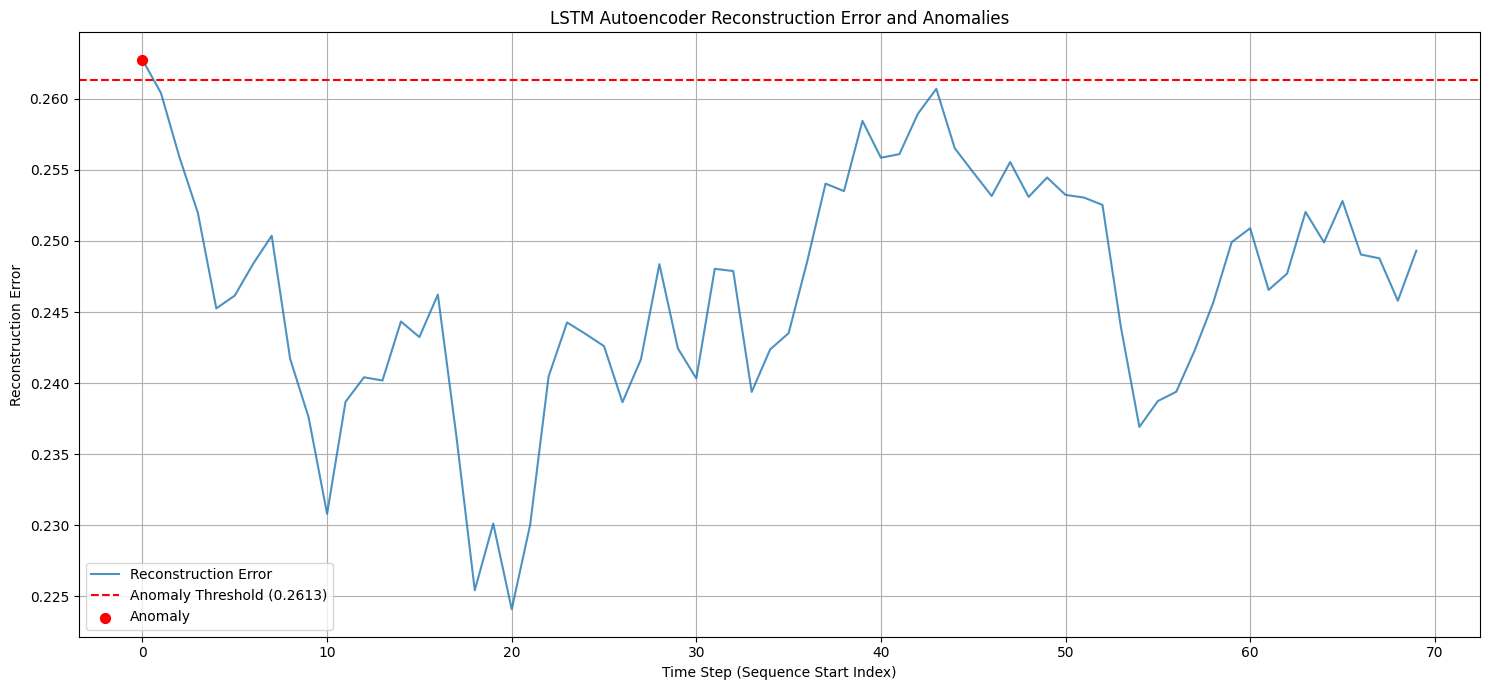

In [13]:
import matplotlib.pyplot as plt

# Create a time index for the reconstruction_errors
time_index = np.arange(len(reconstruction_errors))

plt.figure(figsize=(15, 7))

# Plot the reconstruction errors
plt.plot(time_index, reconstruction_errors, label='Reconstruction Error', alpha=0.8)

# Plot the anomaly threshold
plt.axhline(y=anomaly_threshold, color='r', linestyle='--', label=f'Anomaly Threshold ({anomaly_threshold:.4f})')

# Identify and plot anomalous points
anomaly_indices = np.where(anomalies)[0]
plt.scatter(anomaly_indices, reconstruction_errors[anomaly_indices], color='red', label='Anomaly', s=50, zorder=5)

# Add plot details
plt.title('LSTM Autoencoder Reconstruction Error and Anomalies')
plt.xlabel('Time Step (Sequence Start Index)')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
